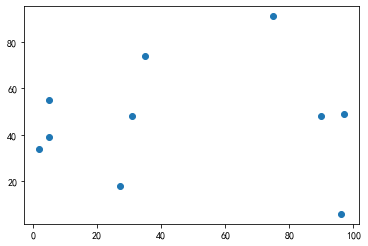

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#生成城市的点
citys=np.random.randint(0,100,(10,2))
plt.scatter(citys[:,0],citys[:,1])

In [2]:
#指定目标函数
#输入：城市的排序
#输出：总的距离数
#先假设城市排序为
def distance(x,y):
    return np.sqrt(abs((y[1]-x[1])**2+(y[0]-x[0])**2))
#总距离函数
def PDistance(Gen):
    #输入城市的顺序
    dis=0
    citys_num=len(Gen)-1
    for i in range(citys_num):
        dis+=distance(citys[Gen[i],:],citys[Gen[i+1],:])
    #输出总距离数
    return dis
#先假设城市的顺序
gen=[0,1,2,3,4,5,6,7,8,9,0]
PDistance(gen)

569.0511698001831

In [3]:
#怎样产生一个基因种群
#从0开始，回到0
#在指定的citys_num:n
#在指定的种群个数：m
#打乱排序的函数
np.random.shuffle(gen)
gen

[1, 7, 6, 8, 0, 5, 9, 2, 4, 3, 0]

In [4]:
m=20
citys_num=10
def Gen_inti_(m,citys_num):
    Gen_pool=[]
    for i in range(m):
        a=[n for n in range(1,citys_num)]
        np.random.shuffle(a)
        aa=[0]+a+[0]
        Gen_pool.append(aa)
    Gen_pool=np.array(Gen_pool)
    return Gen_pool
pool=Gen_inti_(m,citys_num)
#适应度计算
fitness=np.ones(m)
for gindex,gen in enumerate(pool):
    fitness[gindex]=PDistance(gen)
fitness

array([619.21641013, 649.70566187, 555.12343466, 622.29728284,
       603.27010931, 534.6788126 , 460.18189724, 529.99231972,
       669.60328366, 610.17423108, 627.6498896 , 637.71119919,
       688.22799978, 478.74521422, 621.96129485, 518.30317754,
       544.44512707, 487.25671538, 493.2772341 , 637.11369528])

In [5]:
#找最小的适应度值
np.min(fitness)

460.1818972402122

In [6]:
#找找最好的个体
best_index=np.argmin(fitness)
best_index

6

In [7]:
#有些地点重复出现
#基因变异
def variation(Gen):
    points=Gen[1:-1].tolist()
    #找到缺失数据
    na_list=list(set(np.arange(1,10))-set(points))
    #找到重复数据
    duplicate_set=set([i for i in points if points.count(i)>1])
    for i,item in enumerate(duplicate_set):
        points[points.index(item)]=na_list[i]
    Gen[1:-1]=points
    return Gen
#基因交叉
def exchang(gen1,gen2,n=10):
    pointloc=np.random.randint(0,n)
    new_gen1=np.concatenate((gen1[:pointloc],gen2[pointloc:]))
    new_gen2=np.concatenate((gen2[:pointloc],gen1[pointloc:]))
    if np.random.random()<0.5:
        return new_gen1
    else:
        return new_gen2
#基因池处理
for gindx,gen in enumerate(pool):
    pool[gindex]=variation(exchang(pool[best_index],gen,n=citys_num+1))
pool

array([[0, 9, 3, 8, 6, 1, 4, 5, 7, 2, 0],
       [0, 8, 1, 3, 7, 5, 6, 9, 2, 4, 0],
       [0, 6, 2, 4, 7, 8, 1, 3, 5, 9, 0],
       [0, 1, 8, 7, 9, 6, 2, 5, 4, 3, 0],
       [0, 1, 3, 4, 5, 7, 2, 6, 8, 9, 0],
       [0, 3, 8, 2, 1, 7, 4, 6, 5, 9, 0],
       [0, 7, 8, 6, 4, 1, 3, 5, 2, 9, 0],
       [0, 9, 2, 3, 7, 4, 6, 5, 8, 1, 0],
       [0, 7, 1, 4, 5, 3, 2, 6, 8, 9, 0],
       [0, 2, 9, 3, 6, 4, 5, 7, 1, 8, 0],
       [0, 4, 1, 7, 2, 3, 5, 9, 8, 6, 0],
       [0, 6, 8, 7, 9, 3, 4, 2, 1, 5, 0],
       [0, 9, 3, 2, 6, 8, 1, 7, 5, 4, 0],
       [0, 9, 2, 8, 5, 1, 3, 4, 7, 6, 0],
       [0, 1, 2, 8, 3, 5, 7, 4, 6, 9, 0],
       [0, 5, 1, 9, 2, 3, 7, 4, 6, 8, 0],
       [0, 7, 3, 6, 4, 5, 1, 9, 2, 8, 0],
       [0, 4, 2, 5, 9, 6, 7, 8, 1, 3, 0],
       [0, 9, 5, 3, 6, 4, 1, 2, 8, 7, 0],
       [0, 5, 9, 6, 4, 3, 1, 2, 8, 7, 0]])

[0. 5. 9. 2. 8. 7. 6. 3. 4. 1. 0.]
313.86653006355664
13


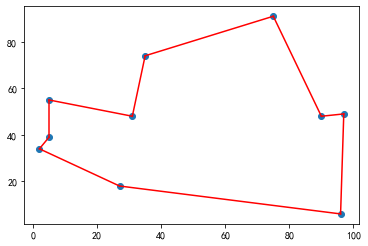

In [11]:
#整合前面所有准备
#迭代多次
# 有了一个初始种群，有了计算的目标函数
m=50
citys_num=10
it,Max_iter=0,100
best_gen=np.ones((Max_iter,citys_num+1))
# 一个空间用于存放最优值
best_value=np.ones(Max_iter)
# 完成适应度的计算
Gen_pool=Gen_inti_(m,citys_num)
for it in range(Max_iter):
    fitness=np.zeros(m)
    for gindx,gen in enumerate(Gen_pool):
        fitness[gindx]=PDistance(gen)
    # 选择最优个体
    # 最优个体适应度
    best_value[it]=np.min(fitness)
    # 最优个体的位置
    best_index=np.argmin(fitness)
    best_gen[it]=Gen_pool[best_index]
    for gindx,gen in enumerate(Gen_pool):
        # 生成的新基因重新变异以后放到基因池里面
        Gen_pool[gindx]=variation(exchang(Gen_pool[best_index],
                                   gen,n=citys_num+1))
    if it>10 and len(set(best_value[it-5:it]))==1:
        break
# 用迭代截止的数据画图
for i in range(citys_num):
    x=citys[int(best_gen[it][i])]
    y=citys[int(best_gen[it][i+1])]
    plt.plot([x[0],y[0]],[x[1],y[1]],'r')
plt.scatter(citys[:,0],citys[:,1])
print(best_gen[it])
print(best_value[it])
print(it)